<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Евгений! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Привет, Олег! Свои изменения буду выделять синим цветом, а комментарии тоже выделять цветом и обводить в рамку.</font>

# Исследование данных об играх.

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования**:
1. Ответить на вопросы:
    * Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
    * Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?
    * Какие платформы лидируют по продажам, растут или падают?
    * Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
    * Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
2. Составить портреты пользователей каждого региона:
    * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    * Самые популярные жанры (топ-5). Поясните разницу.
    * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
3. Проверить гипотезы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали описание проекта. 👍</font>

**Ход исследования**:   


Данные об играх я получу из файла `games.csv`. О качестве данных ничего неизвестно. Поэтому перед тем, как приступить к целям исследования, понадобится обзор данных.   
   
Далее проведу предварительную обработку данных, избавлюсь от дубликатов (если они есть), добавлю новые столбцы и приступлю у проведению исследовательского анализа.

Таким образом, мое исследование пройдет в 7 этапов:
* Обзор данных
* Предобработка данных
* Расчеты и добавление столбцов в данные
* Начало исследовательского анализа. Ответы на вопросы
* Составление портретов пользователей из каждого регоиона
* Проверка гипотез
* Написание общего вывода

Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

## Обзор данных

In [2]:
try:
    games_info = pd.read_csv('games.csv')
except:
    games_info = pd.read_csv('/datasets/games.csv')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Замечательно, что используется код двойной загрузки, локально и с сервера. Часто присылают на ревью проекты с не той ссылкой на датасет.</font>

In [3]:
games_info.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_info.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
games_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_info.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


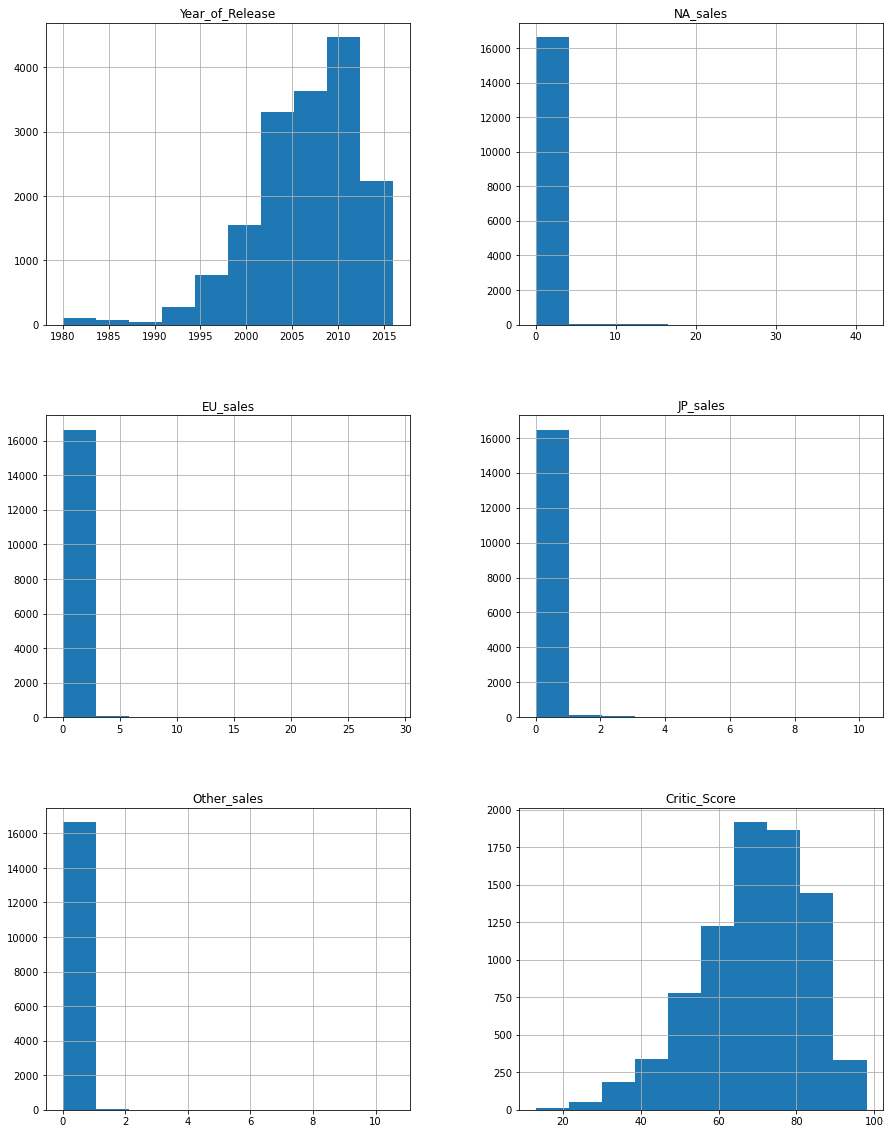

In [7]:
games_info.hist(figsize=(15, 20));

**Выводы на основе первоначального осмотра:**
* Есть пропуски
* Некорректные типы данных некторых столбцов


## Предаброботка данных

Приведем название столбцов к нижнему регистру.

In [8]:
games_info.columns = games_info.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

In [9]:
games_info.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично!

### Обрботка пропусков

In [10]:
# Еше раз посмотрим на количество пропусков в каждом столбце
games_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
#Сделаем красивую табличку с процентным соотношением пропусков
pd.DataFrame(round(games_info.isna().mean()*100,3)).style.background_gradient('coolwarm')

,0
name,0.012000
platform,0.000000
year_of_release,1.609000
genre,0.012000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319000
user_score,40.090000


Заполним пропуски в столбцах следующим образом:
* В столбце `name` <font color='blue'>пропуски в менее, чем 1 проценте строк, удалим эти строки</font>;
* В столбце `genre` <font color='blue'>пропуски в менее, чем 1 проценте строк, удалим эти строки</font>;
* В столбце `year_release` логичной замены нет, можно кончено заменить на число "заглушку", а именно `-1`, но лучше их не использовать, т.к. можно забыть отфильтровать данные, что приведет к искажению результатов. <font color='blue'>Пропуски в этом стобце составляют всего 1,6%. Удалим эти строчки</font>;
* В столбце `critic_score` и `user_score` логичной замены нет, оставим пропуски. Пропуски возникнуть из-за технического сбоя при формировании базы данных.

In [12]:
games_info = games_info.dropna(subset=['name', 'genre', 'year_of_release'])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем обоснованное решение по пропускам колонки имен игр и жанров. У нас всего два пропуска, да еще в этих строках пропуски по отзывам и рейтингу. То есть именно по тем данным, которые мы будем анализировать в проекте. Получается, что мы поставив заглушку на эти пропуски не сохраним данные строчки для анализа, а внесем в них больше неопределенности. Может проще удалить?</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Логичное замечание, исправил</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

Подробнее рассмотрим столбец `user_score`:

In [13]:
games_info['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди чисел и пустых значений присутствует так же аббревиатура **tbd**, что означает неопределенность. Как бы странно не было, заменим эти значения пустыми ячейками.

In [14]:
games_info['user_score'] = games_info['user_score'].replace('tbd', np.nan)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [15]:
games_info['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Отдельно рассмотрим столбец `rating`:

In [16]:
games_info['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Что это означает?
* E  - Everyone;
* М - Mature (17+);
* T - Teen (13+);
* E10+ - Everyone 10+;
* K-A - Kids to Adults. То же самое, что и E (everyone), только использовалось до 1998г. Можно заменить на E;
* AO - Adults Only 18+;
* EC - Early Childhood;
* RP - Rating Pending, используется тогда, когда рейтинг не назначен.   

<font color='blue'>Так как рейтинг ESBR для США и Канады, логично предположить, что игры с пропусками в этом столбце просто не имеют этого рейтинга. Заменим пропуски в этом столбце на "no_ESBR"</font>

In [17]:
games_info['rating'] = games_info['rating'].fillna('no_ESBR')
games_info['rating'] = games_info['rating'].replace('K-A', 'E')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно поставлена заглушка на пропуски в колонке рейтинга. А если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры. Вот только на 'RP' заменять не стоило, так как это рейтинг ожидания именно ESRB, лучше было бы заменить, например, на 'no_ESRB'. Если бы в данных было большое количество рейтингов 'RP', то это была бы уже ошибка.</font><br>
<font color='DarkGreen'>👌 Молодец! Сделали замену устаревшего рейтинга. 👍</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Логичное замечание, исправил</font>

In [18]:
games_info['rating'].unique()

array(['E', 'no_ESBR', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
pd.DataFrame(round(games_info.isna().mean()*100,3)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.453000
user_score,54.616000


В некоторых столбцах от пропусков избавились, а в одном, наоборот, сделали больше. Но это бы помешало дальнейшему анализу.

### Изменение типов данных столбцов

In [20]:
#Еще раз посмотрим на типы столбцов
games_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Сделаем следующие изменения:
* столбец `year_of_release` приведем к целочисленным значениям, т.е. к типу *int*, методом **astype**;
* столбец `user_score` к типу с плавающей точкой, т.е. *float* методом **to_numeric**

In [21]:
games_info['year_of_release'] = games_info['year_of_release'].astype('Int32')
games_info['user_score'] = pd.to_numeric(games_info['user_score'], errors='ignore');

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [22]:
games_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


### Посмотрим есть дубликаты

In [23]:
games_info.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, иногда они сильно искажают анализ.</font>

Явных дуюликатов нет. Посмотрим есть ли неявные.

In [24]:
games_info['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов нет

## Добавим новый столбец

In [25]:
games_info['total_sales'] = games_info['na_sales']\
    + games_info['eu_sales']\
    + games_info['jp_sales']\
    + games_info['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [26]:
games_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESBR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESBR,31.38


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что у нас написано в задании: <br><b>Обработайте пропуски при необходимости:<br>
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;<br>
Опишите причины, которые могли привести к пропускам;</b> <br>А мы это не сделали.</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Эм... Что? В блоке обработка пропусков ни одного красного комментария, а тут в самом конце он появился. Интересно. Спасибо, что скинул мне еще раз задание. Но я не могу понять, что именно не так. Я обработал пропуски, расписал, как именно я заполнил пропуски и написал свои догадки, откуда эти пропуски взялись. Так к чему этот комментарий? Если у меня есть конкетная ошибка, которая не позволяет зачесть мне проект, то где она? </font>

In [27]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games_info.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А про пропуски в колонке года релиза игры мы забыли? А если посмотреть на строчки с этими пропусками, то увидим, что там пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей. Может мы оценим % пропусков (их там около 1,6 %) и примем правильное решение (удалим напрочь).</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Исправил </font>

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы?

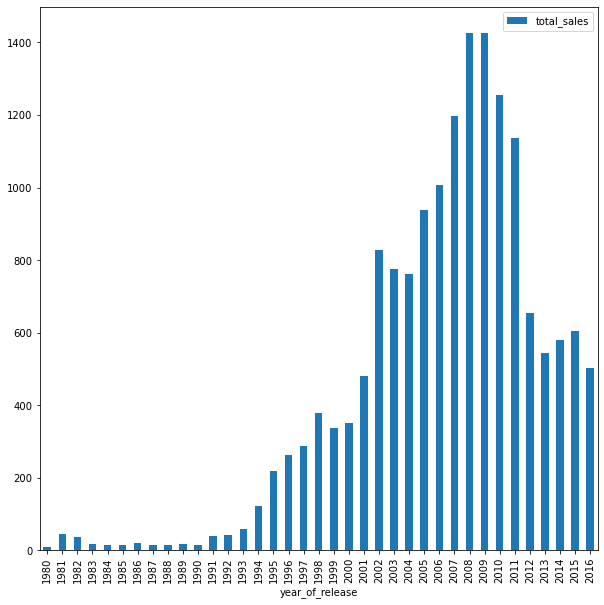

In [28]:
games_info.pivot_table('total_sales', index = 'year_of_release', aggfunc='count').\
    plot(kind='bar', figsize=(10, 10));

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Визуализация подразумевает подписи осей и название графика. </font>

А что с продажами по годам?

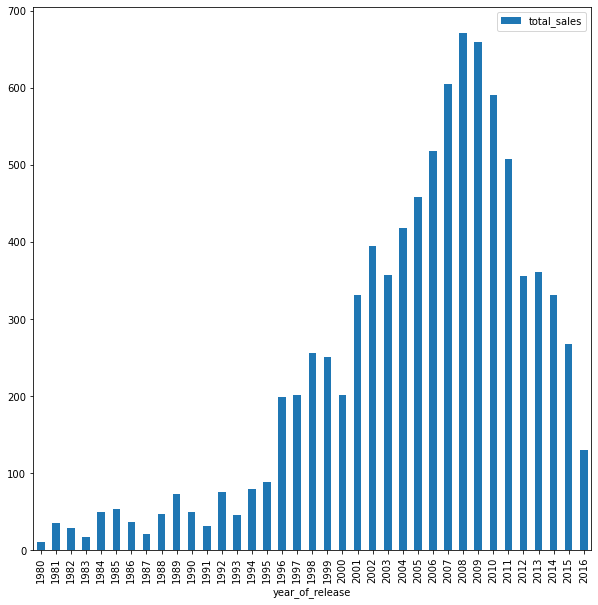

In [29]:
games_info.pivot_table('total_sales', index = 'year_of_release', aggfunc='sum').\
    plot(kind='bar', figsize=(10, 10));

Мысли по этому поводу:
* Количество игр напрямую зависит от прибыли. Больше игр, люди больше трятят деньги, или полностью наоборот.
* C 1980 по 1993 наблюдалось плато, возможные причины это нехватка платформ и разработчиков, а так же недоступность масс к платформам и играм.
* С 1994 по 2008 наблюдается рост продаж и выручки.
* После 2008 геймдэв снижает свою популярность. Связано это с перенасыщением рынка, популяризации мобильных платформ и, возможно, отток инвесторов.

### Как менялись продажи по платформам?

Выделим топ-5 платформ по суммарным продажам и построим для каждой график продаж по годам.

In [30]:
games_info.pivot_table('total_sales', index='platform', aggfunc='sum')\
    .sort_values('total_sales', ascending=False).head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


А вот и наши мастодонты геймдэва. Посмотрим, как у них шли дела от года к году.

In [31]:
#Напишем функцию для построения графика
def year_t0_year_platform_info(name, df):
    df[df['platform'] == name].\
        pivot_table('total_sales', index='year_of_release', aggfunc='sum').\
        plot(kind='bar', figsize=(7,7))
    plt.title('Распределение по годам релиза для ' + name)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Свои функции для выполнения повторяющихся операций - это короткий код и показатель профессионализма. Мы профи! 😄</font>

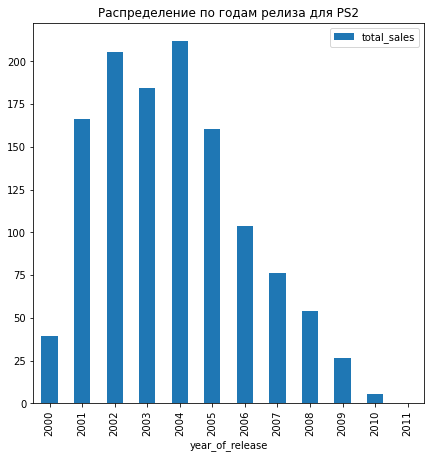

In [32]:
year_t0_year_platform_info('PS2', games_info)

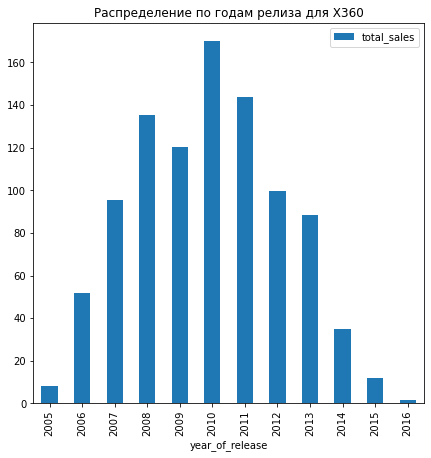

In [33]:
year_t0_year_platform_info('X360', games_info)

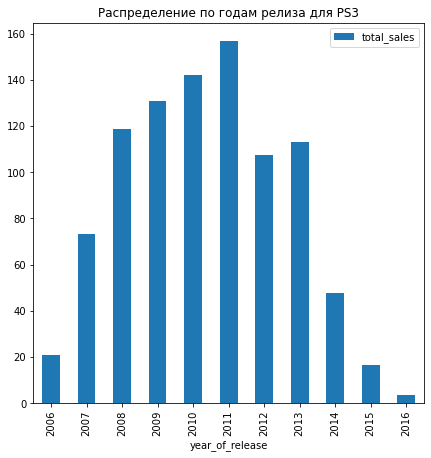

In [34]:
year_t0_year_platform_info('PS3', games_info)

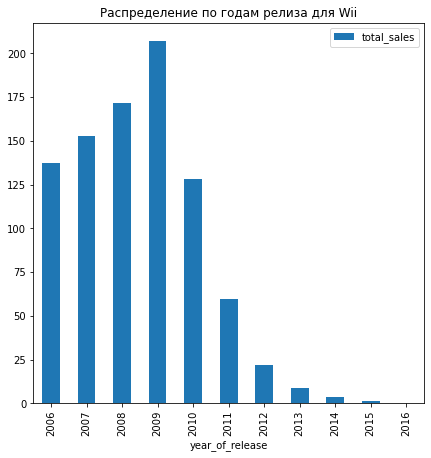

In [35]:
year_t0_year_platform_info('Wii', games_info)

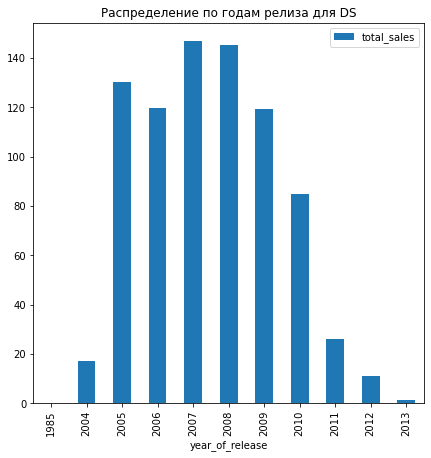

In [36]:
year_t0_year_platform_info('DS', games_info)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким артефактом у платформы DS. Мы бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
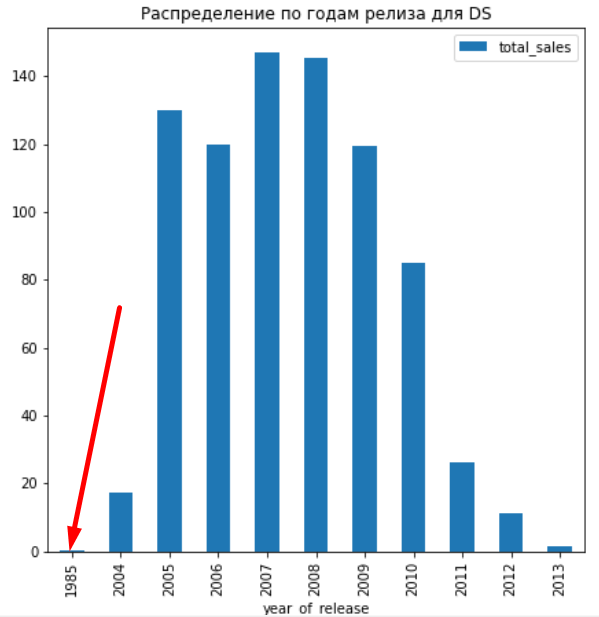

Да уж, все мастодонты оказались оджишими свой век стариками. По графикам можно сделать следующие выводы:
* Средний цикл жизни одной платформы составляет 10 лет;
* Первые 5 лет существования платформы продажи имеют тренд к росту;
* Последующие 5 лет наблюдается явный тренд на снижение.   

Из полученных данных можно сделать вывод: для прогноза на 2017 год следует взять платформы возрастом не более 4ех лет, следовательно данны после 2012 года включительно. 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

In [37]:
actual_games_info = games_info[games_info['year_of_release'] >= 2012]

## Какие платформы лидируют по продажам, растут или падают?

In [38]:
actual_games_info['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Итого в игре остались всего 11 платформ. Разберем каждую в отдельности, кроме тех, что были в предыдущем пункте.

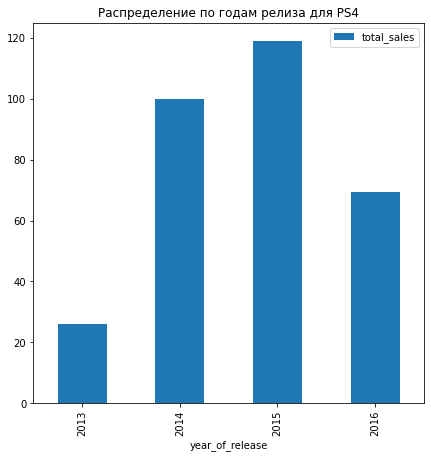

In [39]:
year_t0_year_platform_info('PS4', actual_games_info)

**PS4** является относительно новой платформой. Прибыль от года к году растет. Про 2016 пока нельзя говорить, т.к. данные неполные. Будем считать эту платформу **перспективной**.

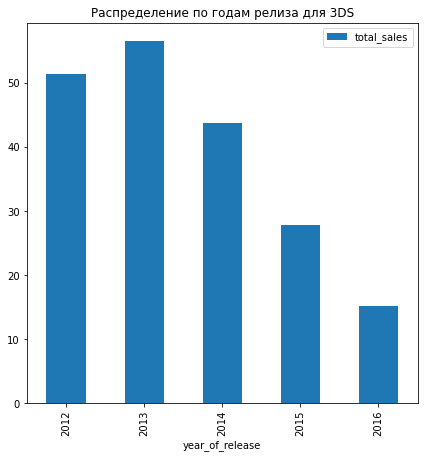

In [40]:
year_t0_year_platform_info('3DS', actual_games_info)

**3DS** на протяжении 3ех предыдущих лет показывает негативную динамику. Платформа **не является перспективной**.

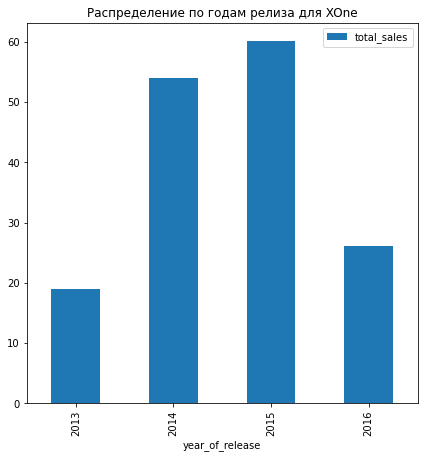

In [41]:
year_t0_year_platform_info('XOne', actual_games_info)

**XOne**, так же как и PS4, явлеяется относительно новой платформой с потенциалом роста. Данная плаформа является **перспективной**.

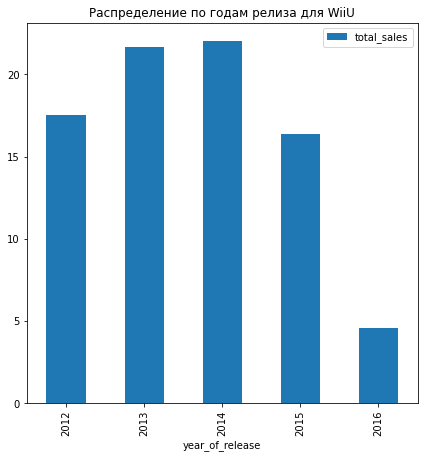

In [42]:
year_t0_year_platform_info('WiiU', actual_games_info)

**WiiU** в 2015 году просела в выручке. В 2016 выручка еще меньше, хоть и данные неполные. Ждем Nintendo Switch в 2017, WiiU оставим в покое на 2017. **Не является перспективной**.

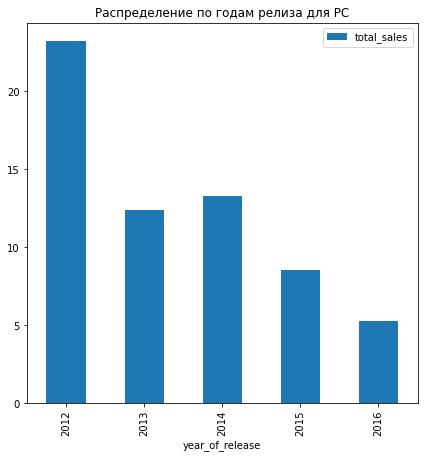

In [43]:
year_t0_year_platform_info('PC', actual_games_info)

**PC** вечная платформа, жалко в последние 3 года находиться в боковике с отрицательной динамокй. Добавим сюда возможность *пиратства*. Можно рассматривать эту пдаформу совместо с релизом на еше одной перспективной плаформе. В одиночку **Не является перспктивной**.

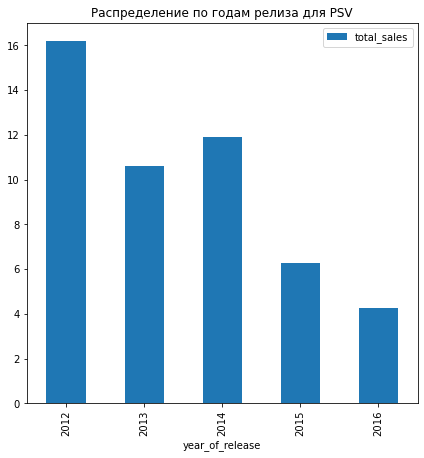

In [44]:
year_t0_year_platform_info('PSV', actual_games_info)

**PSV** Десятилетие Виты подходит к концу. ОЧень низкие продажи по сравнению с предыдущими платформой. Точно **не является перспективной платформой**.

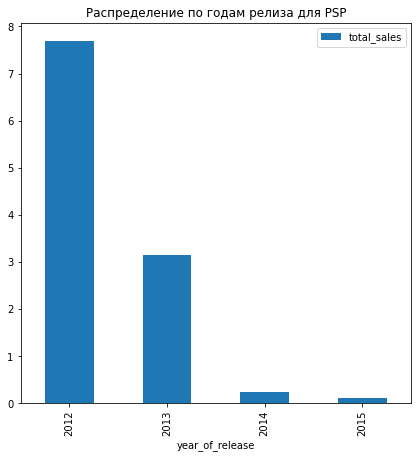

In [45]:
year_t0_year_platform_info('PSP', actual_games_info)

**PSP** не дожила до 2016 года. В 2017 году ее трогать не стоит.

**Выводы:**
* Перспективными платформами являются **PS4** и **XOne**;
* **PSP, PSV, WiiU** не имеют перспектив;
* **PC** является ситуативной платформой.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

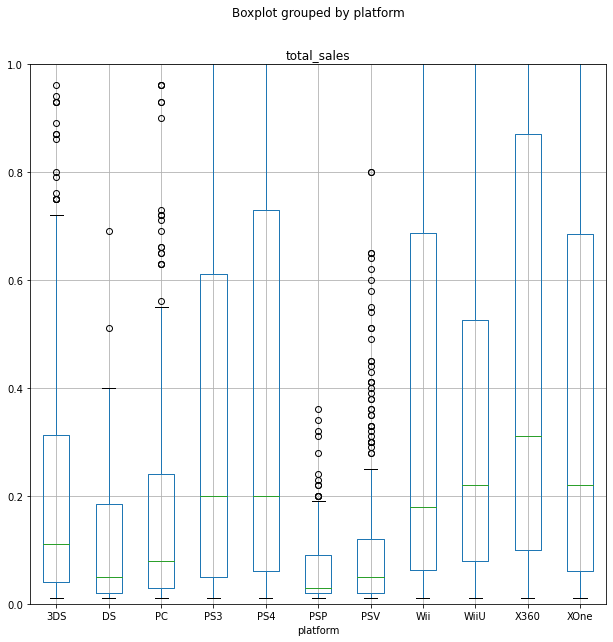

In [46]:
actual_games_info.boxplot('total_sales', by='platform',figsize=(10,10)).set_ylim(0,1);

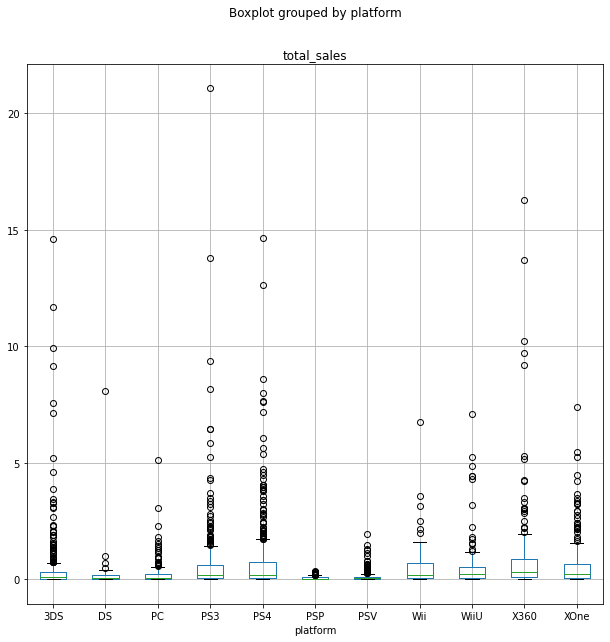

In [47]:
actual_games_info.boxplot('total_sales', by='platform',figsize=(10,10));

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь уместна вторая диаграмма размаха со всеми максимумами продаж за актуальный период, а не только с масштабированными данными. А так мы не видим выбросы.</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Добавил вторую диаграмму размаха без масштабирования</font>

Выводы:
* С 2012 по 2016 год X360 до сих пор остается лидером, не смотря на то, что есть более современных аналог этой плаформы, но XOne только набирает обороты.
* Хоть медиана у PS4 и PS3 одинаковая, 1ый и 3ий квартиль PS4 больше. По сравнению с Xbox, PS4 уже обогнала своего предшественника.
* Хоть с 2012 года у Wii дела идут откровенно плохо, 3ий квантиль прибыли все равно выше, чем у WiiU, Что доказывает безперспективность WiiU.
* Если учесть тот факт, что и X360 и Wii находятся на последних стадиях своего существования, PS4 и XOne являются самыми успешными платформами, причем и самыми новыми, что, определенно, доказывает их перспективность.
* Хужшие показатели у портативных консолей от Sony: PSP и PSV. 
* PC выглядит очень слабо на фоне консолей.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

In [48]:
#actual_games_info[actual_games_info['platform'] == 'PC']\
#            [['total_sales',\
#           'critic_score',\
#           'user_score']]\
#           .corr()


In [49]:
#pd.plotting.scatter_matrix(games_info[games_info['platform'] == 'PC']\
#                           [['total_sales', 'critic_score', 'user_score']], figsize=(12, 12));

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Написал функцию для построения графикуов и выводы матрицы корреляции по названию платформы</font>

<font color='blue'>Рассмотрим влияние оценок критиков и пользоавателей на продажи игр по платформам.</font>

In [50]:
#Функция для выводы графиков и матрицы корреляции
def scores_impact(platform):
    actual_games_info[actual_games_info['platform'] == platform]\
        .plot(kind='scatter', x='total_sales', y='critic_score', figsize=(7,7));
    plt.title('Влияние оценок критиков на продажи игр на платформе ' + platform)
    actual_games_info[actual_games_info['platform'] == platform]\
        .plot(kind='scatter', x='total_sales', y='user_score', figsize=(7,7));
    plt.title('Влияние оценок пользователей на продажи игр на платформе ' + platform)
    print('Матрица кореляции для: ' + platform)
    corr = actual_games_info[actual_games_info['platform'] == platform]\
            [['total_sales',\
           'critic_score',\
           'user_score']]\
           .corr()
    display(corr)
    

Матрица кореляции для: PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.237243,-0.121867
critic_score,0.237243,1.000000,0.432587
user_score,-0.121867,0.432587,1.000000


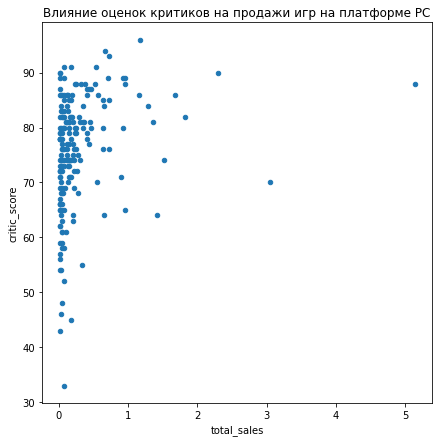

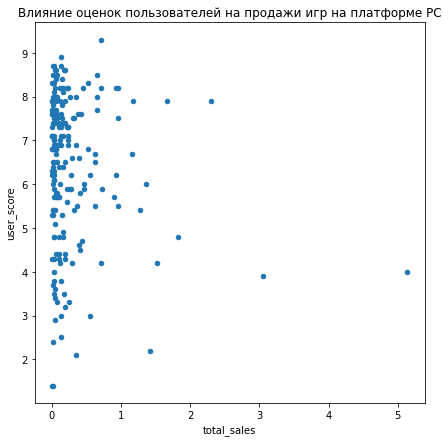

In [51]:
scores_impact('PC')

Матрица кореляции для: PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


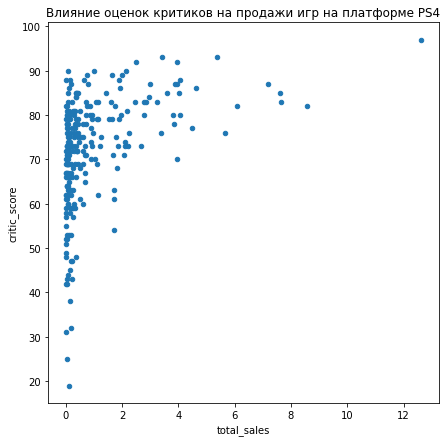

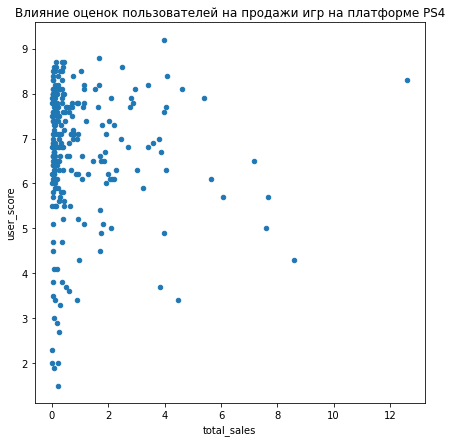

In [52]:
scores_impact('PS4')

Матрица кореляции для: XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


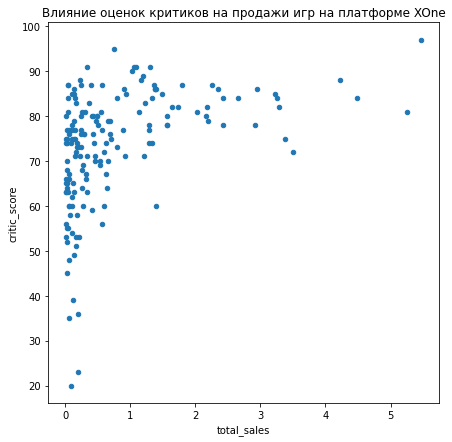

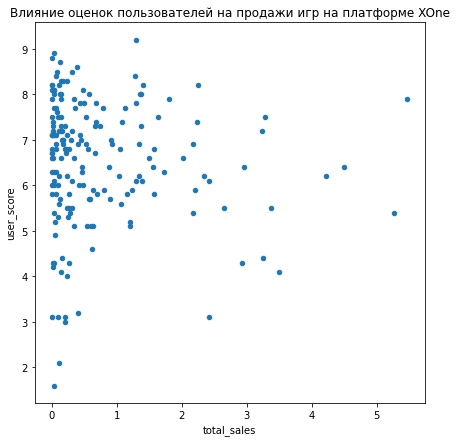

In [53]:
scores_impact('XOne')

Матрица кореляции для: Wii


,total_sales,critic_score,user_score
total_sales,1.000000,-0.424341,0.296197
critic_score,-0.424341,1.000000,0.816295
user_score,0.296197,0.816295,1.000000


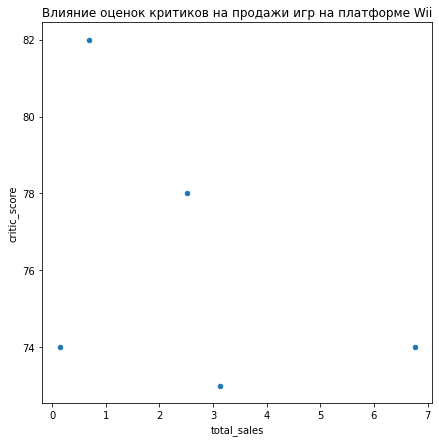

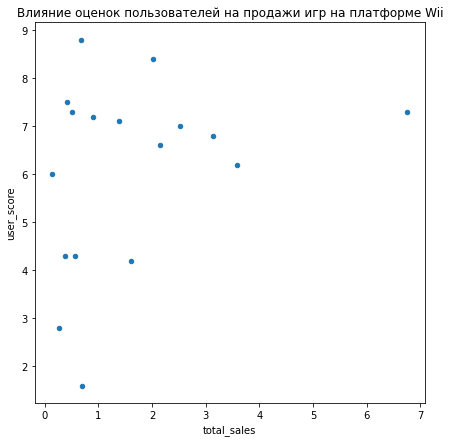

In [54]:
scores_impact('Wii')

Матрица кореляции для: WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


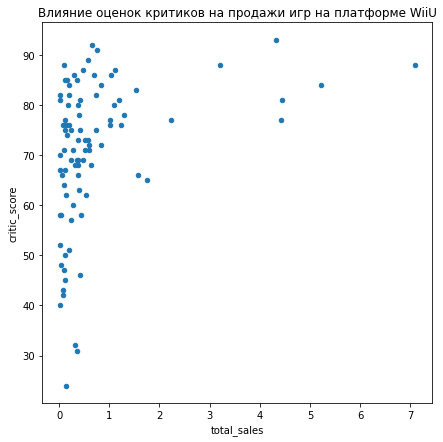

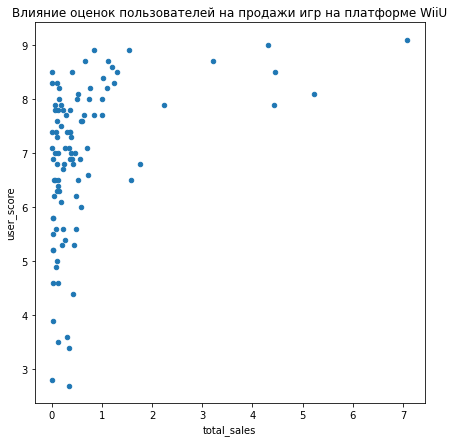

In [55]:
scores_impact('WiiU')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Конечно, диаграмма попарных отношений очень удобна, но в нашем случае она не информативна, так как из-за малого масштаба данных у нас отзывы просто сливаются. Лучше использовать точечные диаграммы: `.plot(kind='scatter',......)`.</font>

Вывод: На продажи больше влияют оценки критиков, а оценки игроков, наоборот, практически не влияют, а иногда даже имеют отрицательную зависимость. Что нельзя сказать про Wii и WiiU, в них наоборот, оцнеки игроков больше влияют на продажи.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну и по второй только посчитали корреляцию. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Понял, исправил этот блок</font>

### Что можно сказать о самых прибыльных жанрах?

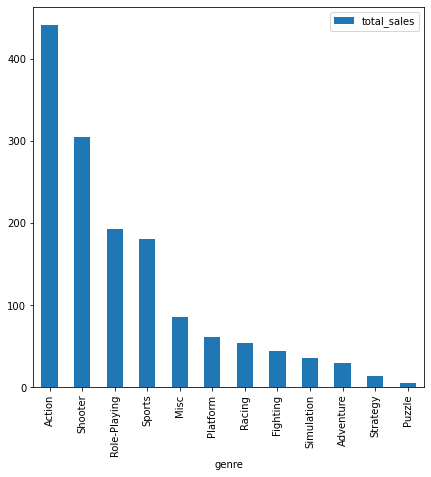

In [56]:
actual_games_info.pivot_table('total_sales', index='genre', aggfunc='sum')\
    .sort_values('total_sales', ascending=False)\
    .plot(kind='bar', figsize=(7,7));

<font color='blue'>Самым прибыльным жанром является Action, но возможно все зависит от количесва игр в этом жанре, или успеху одной игры. Посмотрим распеределения медианного значения по жанрам.</font>

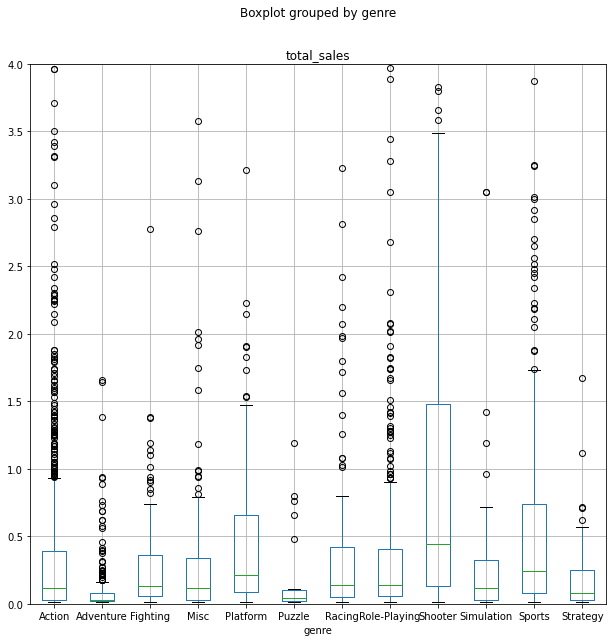

In [57]:
actual_games_info.boxplot('total_sales', by='genre',figsize=(10,10)).set_ylim(0, 4);

In [79]:
genre_median = actual_games_info.pivot_table('total_sales', index ='genre', aggfunc=['median', 'count'])
genre_median.columns = ['Медианное значение продаж', 'Кол-во игр в жанре']
display(genre_median.sort_values('Медианное значение продаж', ascending=False))

,Медианное значение продаж,Кол-во игр в жанре
genre,,
Shooter,0.440,235
Sports,0.240,268
Platform,0.210,85
Role-Playing,0.140,370
Racing,0.140,115
Fighting,0.130,109
Action,0.120,1031
Misc,0.120,192
Simulation,0.120,80


Выводы:   
<font color='blue'> Хоть на первый взгляд может показаться, что самый прибыльный жанр, это Acrion. При дальнейшем рассмотрении, медианное значение прибыли этого жанра далеко не на первом месте, так же количесво игр в этом жанре в 3 раза больше второго по популярности. На основе данных можно выделить жанр Shooter, который при небольшом количестве игр имеет самую большую медианную прибыль, а так же второй по величине в выручке за период с 2012 по 2016 гг.</font>


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Действительно попал в ловушку. Исправил.</font>

In [59]:
actual_games_info.pivot_table(['critic_score', 'user_score'], index='genre', aggfunc='median')

,critic_score,user_score
genre,,
Action,73.0,7.10
Adventure,72.0,7.55
Fighting,74.0,7.40
Misc,75.0,7.00
Platform,78.0,7.20
Puzzle,71.0,7.90
Racing,75.0,6.30
Role-Playing,74.0,7.50
Shooter,76.0,6.70


В среднем оценки популярных и непопулярных жанров не сильно отличаются. Из интересного: лучший показатель оценок критиков имеет 2ой по популярности с конца жанр, а именно Стратегии.

## Составим портрет пользователя каждого региона.

Для каждого региона выделим:
* топ-5 жанров;
* топ-5 платформ;
* влияние рейтинга ESRB на продажи.

In [60]:
#функция для вывода графика топ-5 жанров для региона
def top_5_genre(region):
    region_sales = region + '_sales'
    actual_games_info.pivot_table(region_sales, index='genre', aggfunc='sum')\
    .sort_values(region_sales, ascending=False).head()\
    .plot(kind='bar', figsize=(7,7))
    plt.title('Топ-5 жанров для ' + region.upper() + ' региона')

In [61]:
#функция для вывода графика топ-5 платформ для региона
def top_5_platform(region):
    region_sales = region + '_sales'
    actual_games_info.pivot_table(region_sales, index='platform', aggfunc='sum')\
    .sort_values(region_sales, ascending=False).head()\
    .plot(kind='bar', figsize=(7,7))
    plt.title('Топ-5 платформ для ' + region.upper() + ' региона')

In [62]:
#функция для вывода продаж в зависимости от рейтинга ESRB в регионе
def ESRB_impact(region):
    region_sales = region + '_sales'
    actual_games_info.pivot_table(region_sales, index='rating', aggfunc='sum')\
    .sort_values(region_sales, ascending=False)\
    .plot(kind='bar', figsize=(7,7))
    plt.title('Продажи от ретинга в ' + region.upper() + ' регионе')

### Америка (NA)

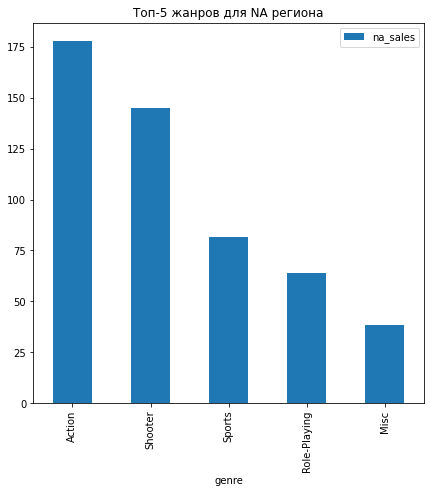

In [63]:
top_5_genre('na')

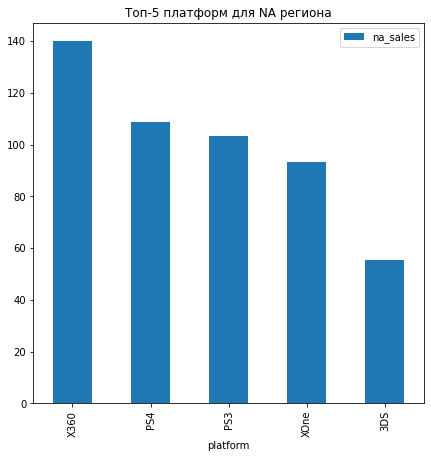

In [64]:
top_5_platform('na')

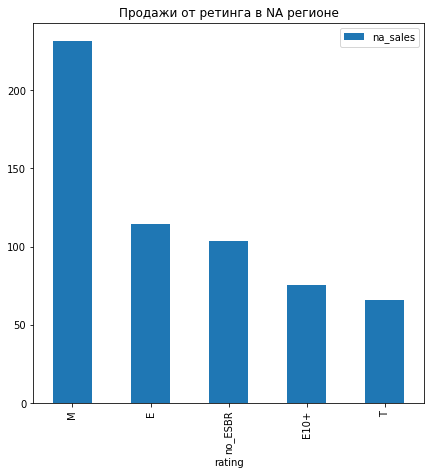

In [65]:
ESRB_impact('na')

**Портрет пользователя**   
На родине Microsoft доминирует Microsoft, ничего необычного. Самым популярным жанром является Action, далее идет Shooter. Самый прибыльный возрастной рейтинг - М, т.е. 17+.

### Европа (EU)

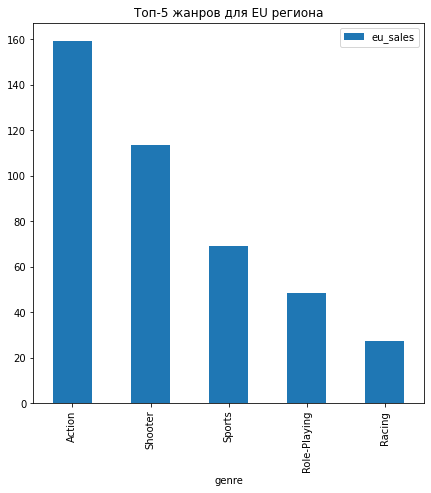

In [66]:
top_5_genre('eu')

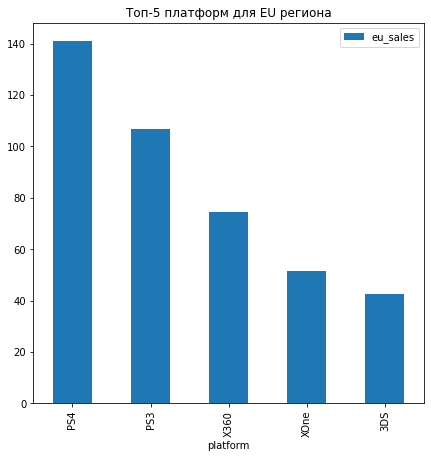

In [67]:
top_5_platform('eu')

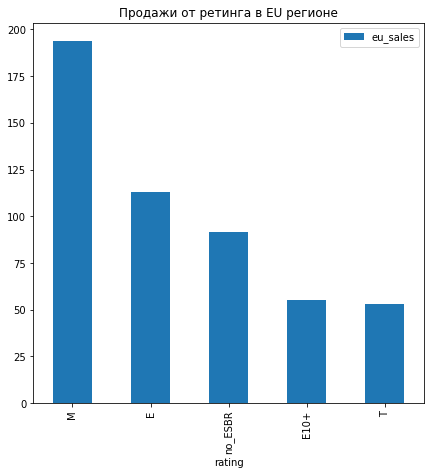

In [68]:
ESRB_impact('eu')

**Портрет пользователя**   
В Европе предпочитают больше японского производителя, а именно Sony, причем и PS4 и PS3 прибыльнее X360. Топ жанров схож с Америкой, различается только последнее место, вместо Misc, в Европе больше предпочитают Гонки (Raving). В рейтинге раззницы с Америкой тоже нет, так же лидирует М (17+)

### Япония (JP)

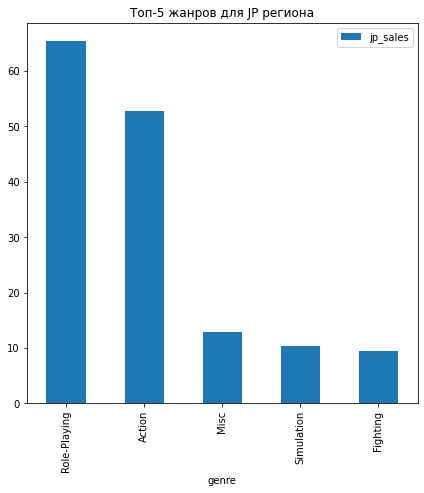

In [69]:
top_5_genre('jp')

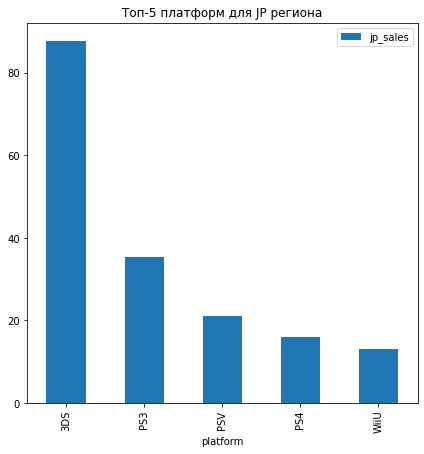

In [70]:
top_5_platform('jp')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 У нас в задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Тогда на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
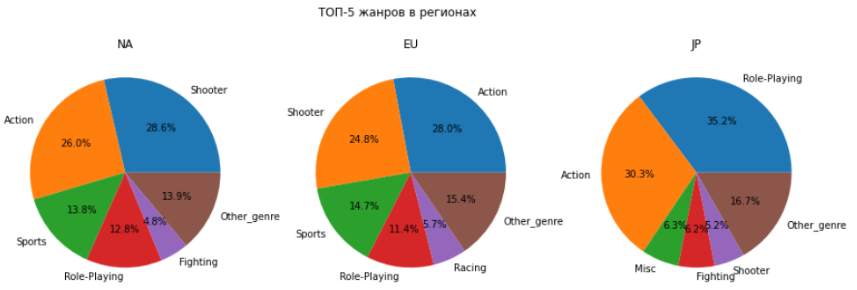

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>К сожалению, пока не владею этим инструментом, было бы здорово, если бы ты прикрепил ссылку на какую-нибубь статью, где опысывается работа с курговыми диаграммами</font>

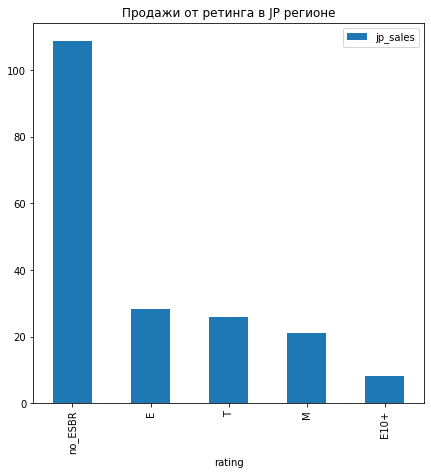

In [71]:
ESRB_impact('jp')

**Портрет пользователя**   
В Японии своя атмосфера. Между двумя гигантами консольного гейминга, Японцы отдают предпочтенее Nintendo с большим отрывом. В топ жанров с двух ног врывается RPG (все знают, что японское RPG самое лучшее) и только потом Action. Эти 2 жанра сильно отрываются от других. Так же большинство игр не имееют рейтинга ESPR, второй по популярности рейтинг Е.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Мы должны это учитывать при предобработке данных. 👍</font>

### Общий вывод

* Чтобы иметь успех на Американском рынке, нужна игра в жанре Action на консоль от Microsoft, а именно Xbox One.
* Чтобы иметь успех в Европе, нужна игра жанре Action, но уже на консоль от Sony, а именно PS4.
* Чтобы иметь успех в Японии, нужно прыгнуть выше головы, и сделать RPG лучше самих японцев на консоль от Nintendo, а именно 3DS, ну или готовить на Nintendo switch (хоть ее и нет в базе данных, она в сердечке <3).

## Проверка гипотез

In [72]:
#введем значение Альфа для проверки гипотез
alpha = 0.05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: средний пользовательский рейтинг платформ Xbox One и PC различается

<font color='blue'>Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод `st.stats.ttest_ind`, так же мы будем использовать параметр equal_var=True.

<font color='blue'>Если `p-value` будет меньше выбранного уровня значимости $\alpha < 0,5$, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [73]:
xone = games_info[(games_info['platform'] == 'XOne')  & (games_info['user_score'] > 0)]['user_score']
pc = games_info[(games_info['platform'] == 'PC')  & (games_info['user_score'] > 0)]['user_score']


results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо, что отфильтровали пропуски. Только для этого лучше использовать стандартные методы.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: средний пользовательский рейтинг жанров Action и Sports различается

<font color='blue'>Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод `st.stats.ttest_ind`, так же мы будем использовать параметр equal_var=True.

<font color='blue'>Если `p-value` будет меньше выбранного уровня значимости $\alpha < 0,5$, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.<\font>

In [74]:
action = games_info[(games_info['genre'] == 'Action')  & (games_info['user_score'] > 0)]['user_score']
sports = games_info[(games_info['genre'] == 'Sports')  & (games_info['user_score'] > 0)]['user_score']


results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b>
</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>Формулировка гипотез у меня же есть... Или это не то? Добавил еще критерий.</font>

## Общий вывод

Итак, на основе исторических данных о продажах игр за 2016 нам необходимо было выявить закономерности, определяющие успешность игр.

В ходе исследования мы сделали следующие выводы:

* самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft. Какое-то время будут актуальны игры для платформ Nintendo 3DS;

* если делить по рынкам, то в Америке следует сделать ставку на игры платформы Xbox One, в Европе - на PS4, а в Японии - на 3DS;

* из жанров мы рекомендуем выбрать игры в стиле Action,Shoters и Sports (а вот для японского рынка любимым жанром является Role-Playing);

* оценки пользователей на продажи не влияют, а вот к оценкам критиков можно и приглядется.

Так же, мы проверили две гипотезы, заявленные в самом начале исследования. В результате этого:

* средние пользовательские рейтинги Xbox One и PC различаются (различие средних значений статистически значимо);

* гипотеза о различии средних значений пользовательских оценок игр двух жанров Action и Sports не была отвергнута.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Евгений, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать анализ причин и методов обработки пропусков. Переделать диаграммы рассеяния при анализе отзывов. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж и построить диаграммы размаха. Необходимо сделать пояснения по разделу гипотез согласно заданию.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<div style="border:solid Chocolate 2px; padding: 40px">
</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='blue'>В целом вроде все исправил.</font>